In [1]:
# Importing Necesarry Packages
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
get_ipython().run_line_magic('matplotlib', 'inline')
warnings.filterwarnings("ignore") 

In [3]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
df.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [10]:
corr=df.corr()
corr.shape

(14, 14)

<Axes: >

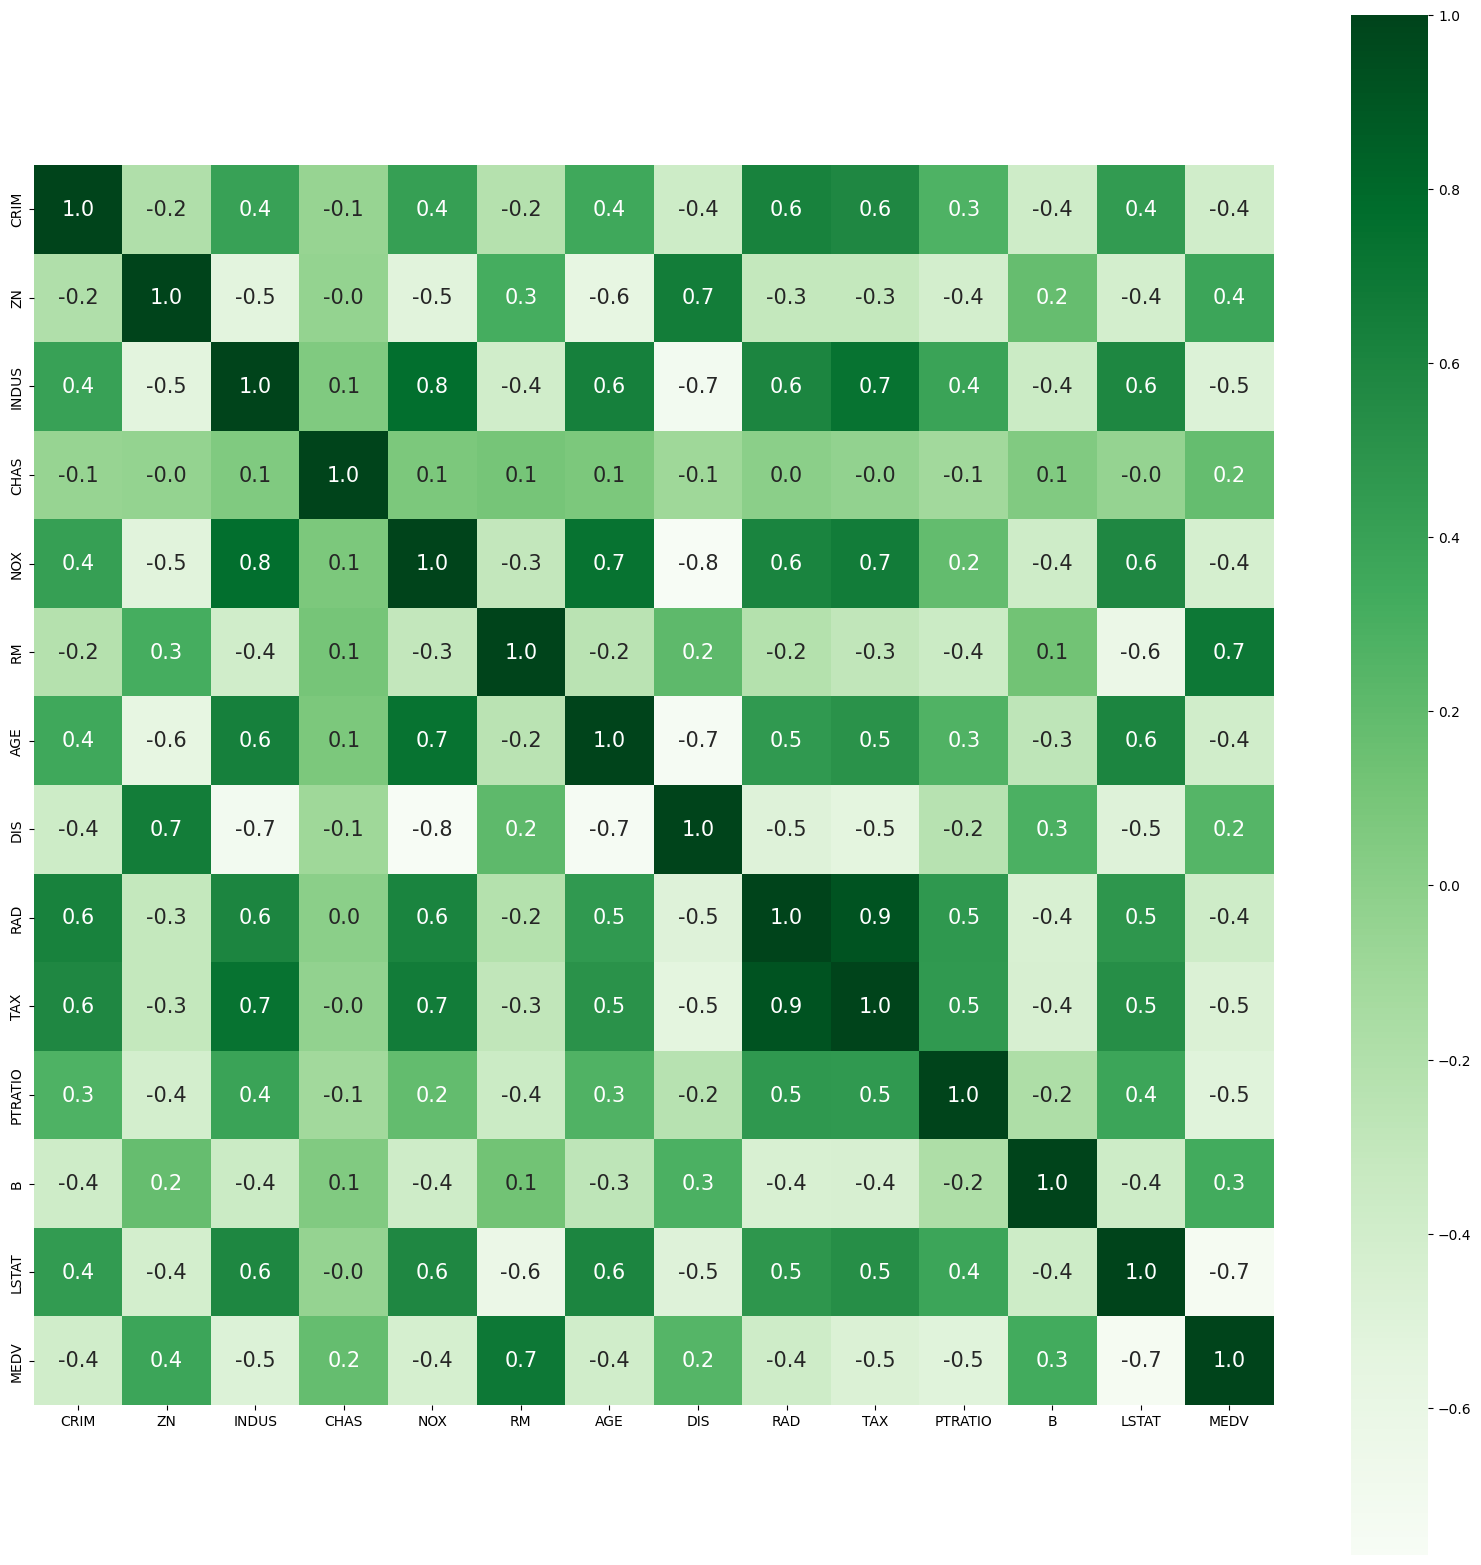

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15},cmap='Greens')

In [12]:
updated_df=df.dropna(axis=1)
updated_df.info()
x=updated_df.drop(['MEDV'],axis=1)
y=updated_df['MEDV']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NOX      506 non-null    float64
 1   RM       506 non-null    float64
 2   DIS      506 non-null    float64
 3   RAD      506 non-null    int64  
 4   TAX      506 non-null    int64  
 5   PTRATIO  506 non-null    float64
 6   B        506 non-null    float64
 7   MEDV     506 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 31.8 KB


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=4)


In [15]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [16]:
lm.intercept_

16.155820254851328

In [17]:
coefficients=pd.DataFrame([x_train.columns, lm.coef_]).T
coefficients=coefficients.rename(columns={0:'Attribute',1:'coefficients'})
coefficients

,Attribute,coefficients
0,NOX,-21.225403
1,RM,6.329222
2,DIS,-0.844769
3,RAD,0.268119
4,TAX,-0.015109
5,PTRATIO,-1.106447
6,B,0.015522


In [18]:
#Model Evaluation

In [19]:
y_pred=lm.predict(x_train)

In [20]:
#model Evaluation
print('R^2:', metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:', 1-(1-metrics.r2_score(y_train, y_pred)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


R^2: 0.6274489477176797
Adjusted R^2: 0.6401430015732397
MAE: 3.511833096393609
MSE: 28.04222679696973
RMSE: 5.295491176177119


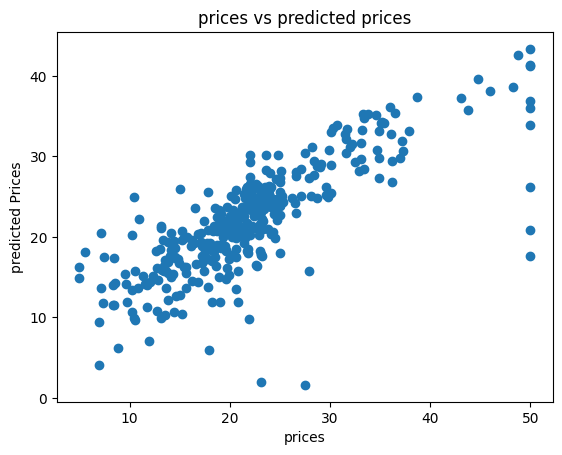

In [21]:
plt.scatter(y_train, y_pred)
plt.xlabel("prices")
plt.ylabel("predicted Prices")
plt.title("prices vs predicted prices")
plt.show()

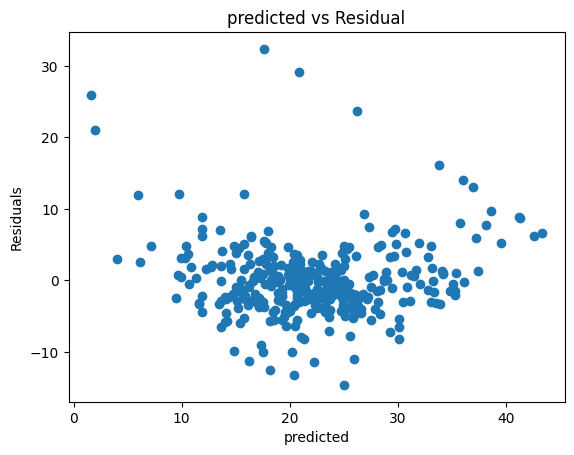

In [22]:
plt.scatter(y_pred, y_train-y_pred)
plt.title("predicted vs Residual")
plt.xlabel("predicted")
plt.ylabel("Residuals")
plt.show()

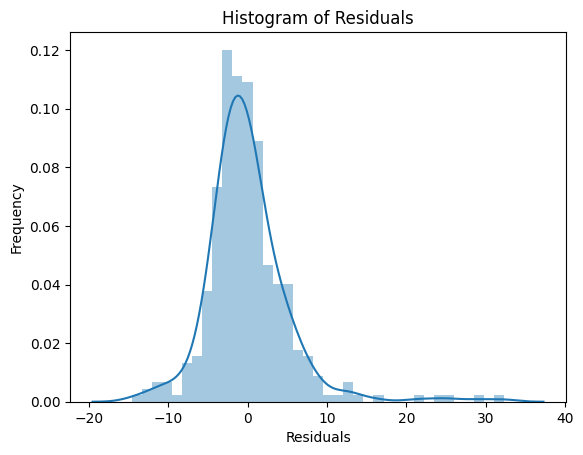

In [23]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [24]:
#for test Data
y_test_pred=lm.predict(x_test)

In [26]:
#model Evaluation
acc_linreg=metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:', 1-(1-metrics.r2_score(y_test, y_test_pred)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6781826968812523
Adjusted R^2: 0.7111499113129799
MAE: 3.7036044449242307
MSE: 33.604186053211585
RMSE: 5.796911768624013
